In [34]:
import numpy as np
from sklearn.metrics import pairwise_distances
import os
import gudhi as gd
from sklearn_tda import *

import open3d as o3d
from open3d import JVisualizer

import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

# Preprocessing

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn_tda import *
from sklearn_tda.preprocessing import Clamping

In [36]:
D = np.array([[0.,4.],[1.,2.],[3.,8.],[6.,8.], [0., np.inf], [5., np.inf]])
diags = [D]
diags

[array([[ 0.,  4.],
        [ 1.,  2.],
        [ 3.,  8.],
        [ 6.,  8.],
        [ 0., inf],
        [ 5., inf]])]

In [37]:
diags = DiagramSelector(use=True, point_type="finite").fit_transform(diags)
diags = DiagramScaler(use=True, scalers=[([0,1], MinMaxScaler())]).fit_transform(diags)
diags = DiagramScaler(use=True, scalers=[([1], Clamping(limit=.9))]).fit_transform(diags)
diags

[array([[0.   , 0.5  ],
        [0.125, 0.25 ],
        [0.375, 0.9  ],
        [0.75 , 0.9  ]])]

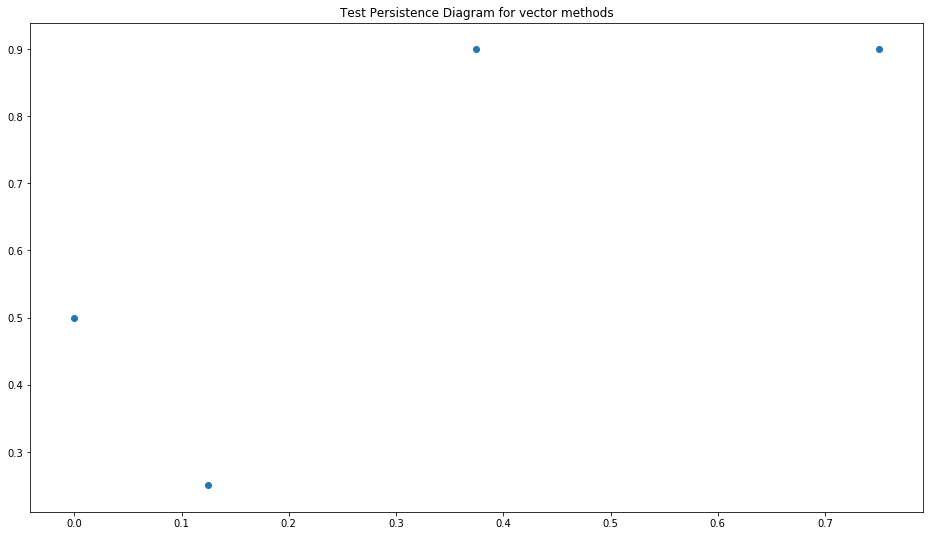

In [38]:
D = diags[0]
plt.scatter(D[:,0],D[:,1])
#plt.plot([0.,1.],[0.,1.])
plt.title("Test Persistence Diagram for vector methods")
plt.show()

# Vectorization

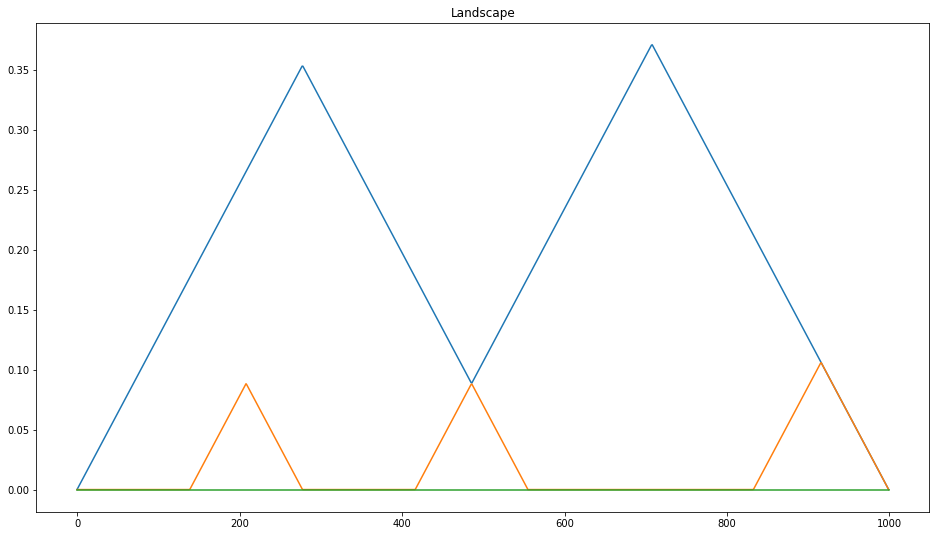

In [39]:
LS = Landscape(resolution=1000)
L = LS.fit_transform(diags)
plt.plot(L[0][:1000])
plt.plot(L[0][1000:2000])
plt.plot(L[0][2000:3000])
plt.title("Landscape")
plt.show()

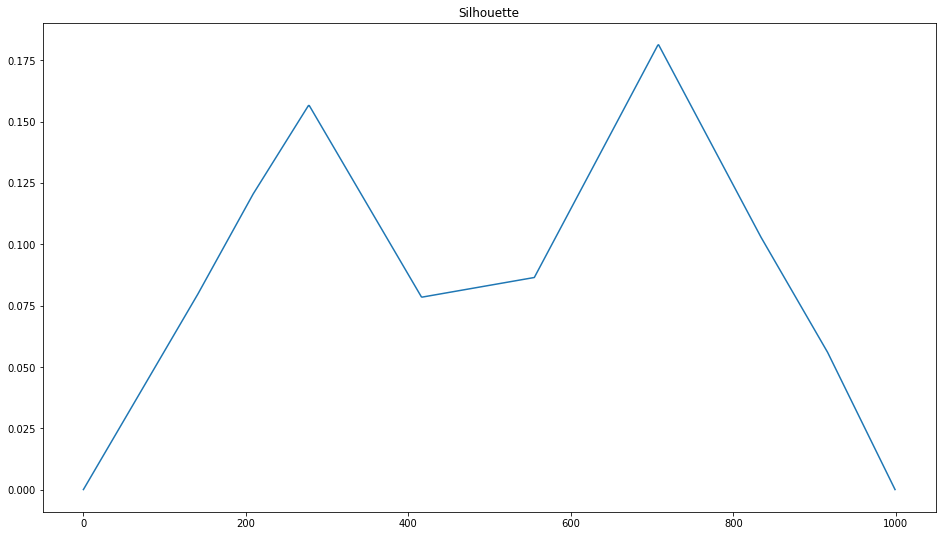

In [40]:
def pow(n):
    return lambda x: np.power(x[1]-x[0],n)

SH = Silhouette(resolution=1000, weight=pow(2))
sh = SH.fit_transform(diags)
plt.plot(sh[0])
plt.title("Silhouette")
plt.show()

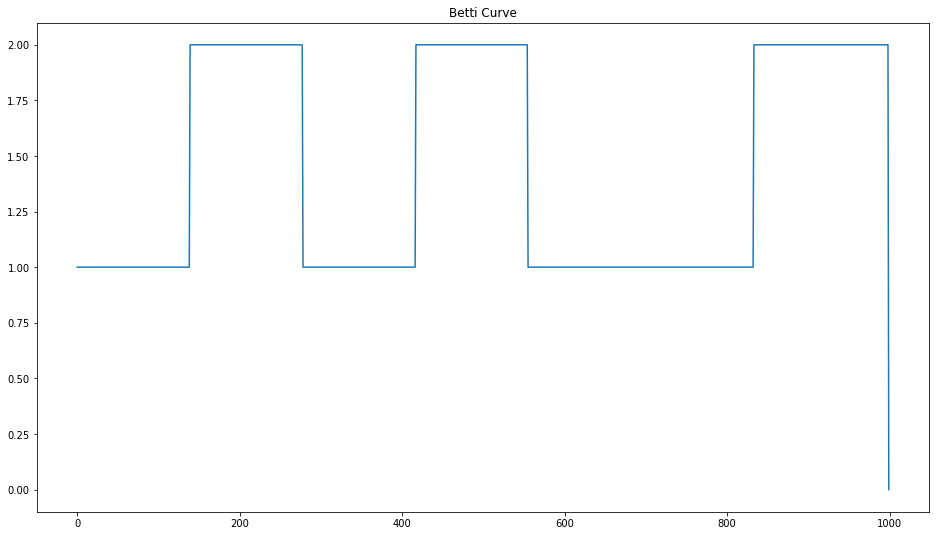

In [17]:
BC = BettiCurve(resolution=1000)
bc = BC.fit_transform(diags)
plt.plot(bc[0])
plt.title("Betti Curve")
plt.show()

In [19]:
CP = ComplexPolynomial(threshold=-1, polynomial_type="T")
cp = CP.fit_transform(diags)
print("Complex polynomial is " + str(cp[0,:]))

TV = TopologicalVector(threshold=-1)
tv = TV.fit_transform(diags)
print("Topological vector is " + str(tv[0,:]))

Complex polynomial is [-0.03245984-8.79403907e-01j -0.26344472+2.08975106e-02j
  0.00364472+2.94201744e-02j  0.001202  -2.63174520e-04j]
Topological vector is [0.2625 0.2625 0.075  0.075 ]


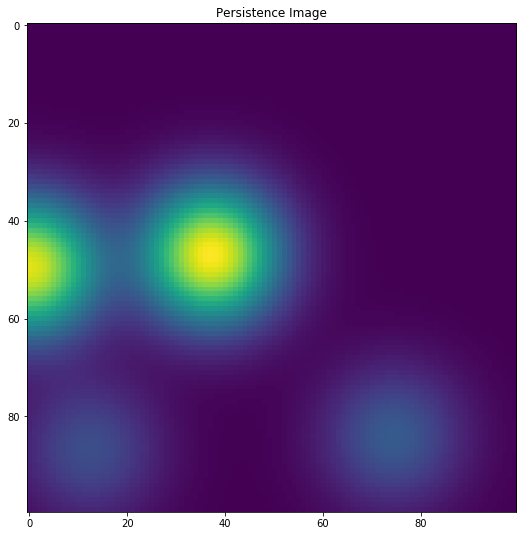

In [20]:
PI = PersistenceImage(bandwidth=.1, weight=lambda x: x[1], im_range=[0,1,0,1], resolution=[100,100])
pi = PI.fit_transform(diags)
plt.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
plt.title("Persistence Image")
plt.show()

Entropy statistic is [0.74608589]


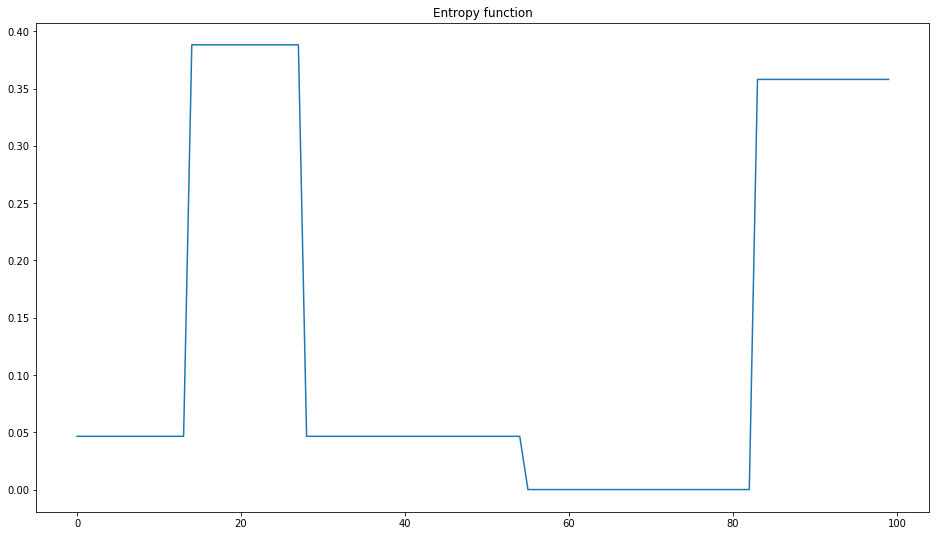

In [21]:
ET = Entropy(mode="scalar")
et = ET.fit_transform(diags)
print("Entropy statistic is " + str(et[0,:]))

ET = Entropy(mode="vector", normalized=False)
et = ET.fit_transform(diags)
plt.plot(et[0])
plt.title("Entropy function")
plt.show()

# Kernels

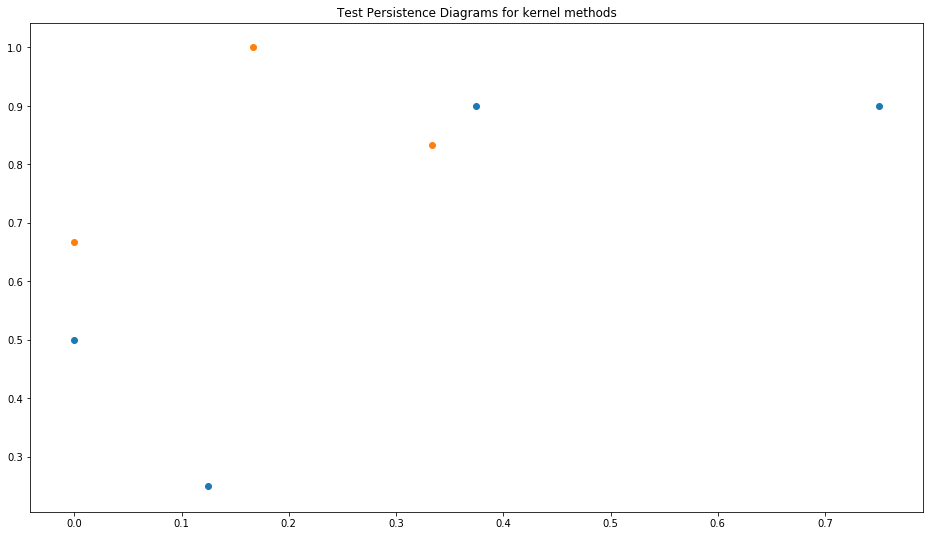

In [45]:
D = np.array([[1.,5.],[3.,6.],[2.,7.]])
diags2 = [D]
diags2 = DiagramScaler(use=True, scalers=[([0,1], MinMaxScaler())]).fit_transform(diags2)
D = diags[0]
plt.scatter(D[:,0],D[:,1])


D = diags2[0]
plt.scatter(D[:,0],D[:,1])
plt.title("Test Persistence Diagrams for kernel methods")
plt.show()

In [25]:
def arctan(C,p):
    return lambda x: C*np.arctan(np.power(x[1], p))

PWG = PersistenceWeightedGaussianKernel(bandwidth=1., kernel_approx=None, weight=arctan(1.,1.))
X = PWG.fit(diags)
Y = PWG.transform(diags2)
print("PWG kernel is " + str(Y[0][0]))

PWG = PersistenceWeightedGaussianKernel(kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])), weight=arctan(1.,1.))
X = PWG.fit(diags)
Y = PWG.transform(diags2)
print("Approximate PWG kernel is " + str(Y[0][0]))

PSS = PersistenceScaleSpaceKernel(bandwidth=1.)
X = PSS.fit(diags)
Y = PSS.transform(diags2)
print("PSS kernel is " + str(Y[0][0]))

PSS = PersistenceScaleSpaceKernel(kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])))
X = PSS.fit(diags)
Y = PSS.transform(diags2)
print("Approximate PSS kernel is " + str(Y[0][0]))

sW = SlicedWassersteinDistance(num_directions=100)
X = sW.fit(diags)
Y = sW.transform(diags2)
print("SW distance is " + str(Y[0][0]))

SW = SlicedWassersteinKernel(num_directions=100, bandwidth=1.)
X = SW.fit(diags)
Y = SW.transform(diags2)
print("SW kernel is " + str(Y[0][0]))

W = BottleneckDistance(epsilon=.001)
X = W.fit(diags)
Y = W.transform(diags2)
print("Bottleneck distance is " + str(Y[0][0]))

PF = PersistenceFisherKernel(bandwidth_fisher=1., bandwidth=1.)
X = PF.fit(diags)
Y = PF.transform(diags2)
print("PF kernel is " + str(Y[0][0]))

PF = PersistenceFisherKernel(bandwidth_fisher=1., bandwidth=1., kernel_approx=RBFSampler(gamma=1./2, n_components=100000).fit(np.ones([1,2])))
X = PF.fit(diags)
Y = PF.transform(diags2)
print("Approximate PF kernel is " + str(Y[0][0]))

PWG kernel is 1.6016785633976234
Approximate PWG kernel is 1.6019068985453155
PSS kernel is 0.8174721864008387
Approximate PSS kernel is 0.8120366286235455
SW distance is 0.5993200573609824
SW kernel is 0.5491849234187985
Bottleneck distance is 0.24959462960701104
PF kernel is 0.9923236265091478
Approximate PF kernel is 0.9922989993329838


# Clustering

## Tomato

In [48]:
from sklearn_tda import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

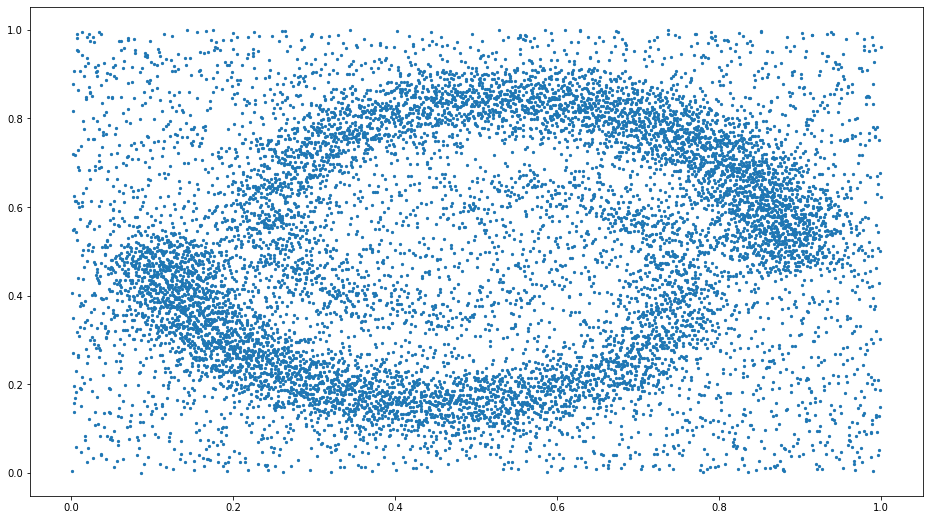

In [50]:
X = np.loadtxt("example/inputs/spiral_w_o_density.txt")[::10,:]
X[:,0]/=max(X[:,0])
X[:,1]/=max(X[:,1])
plt.scatter(X[:,0], X[:,1], s=5.)
plt.show()

Computing density estimator


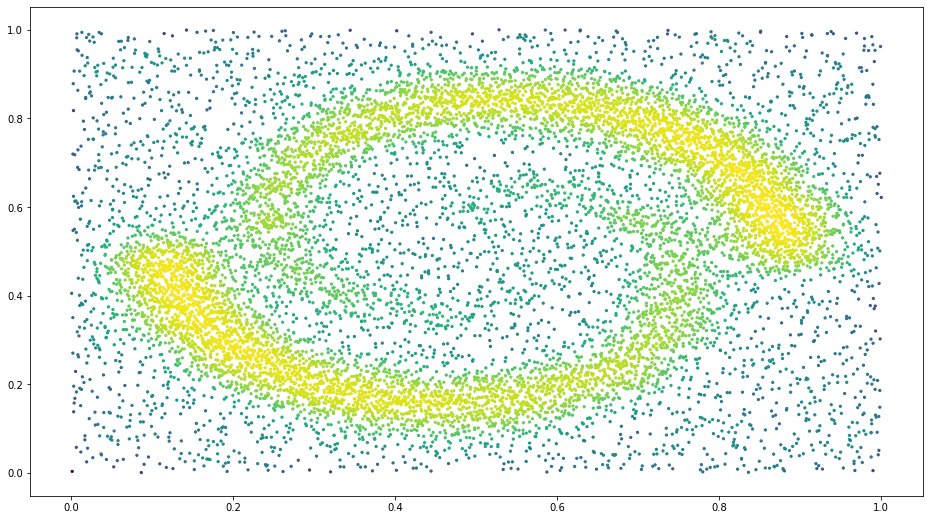

Computing underlying graph
Sorting points by density
Computing tau
tau = 0.3
Applying UF sequentially


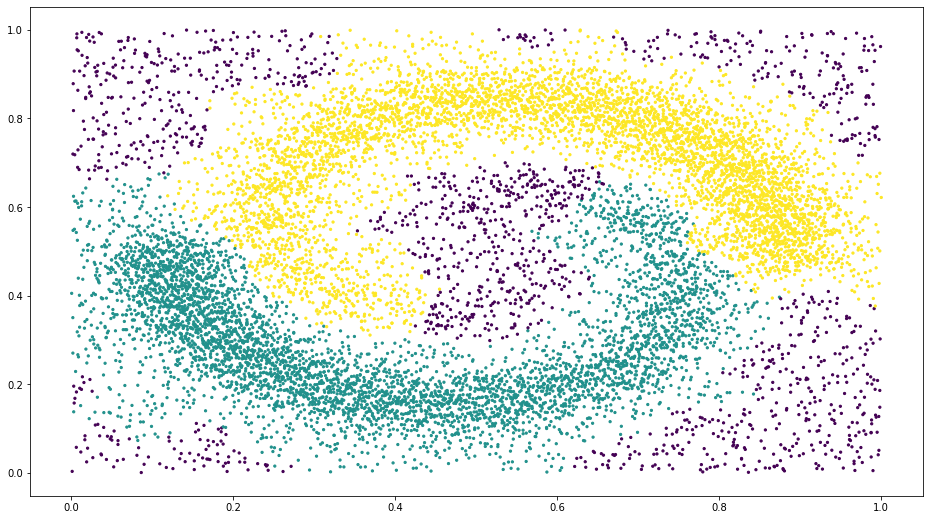

In [51]:
# ToMATo with custom parameters
tom = ToMATo(tau=.3, density_estimator=KernelDensity(bandwidth=.02), n_neighbors=10, verbose=True)
tom.fit(X)
plt.scatter(X[:,0], X[:,1], s=5., c=tom.labels_)
plt.show()

Computing density estimator


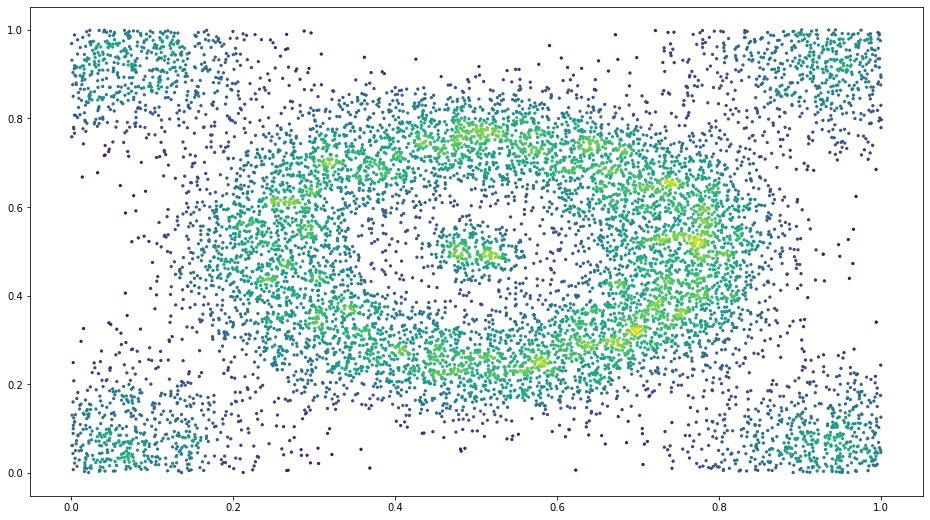

Computing underlying graph
radius = 0.08665717075453336
Sorting points by density
Computing tau
Deprecated parameter. It has been replaced by max_intervals


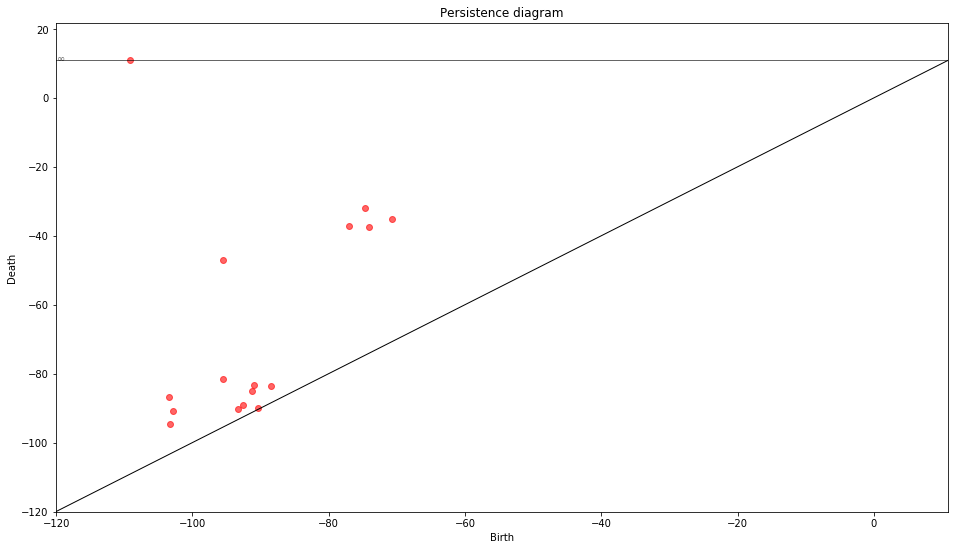

tau = 26.105738004971784
Applying UF sequentially


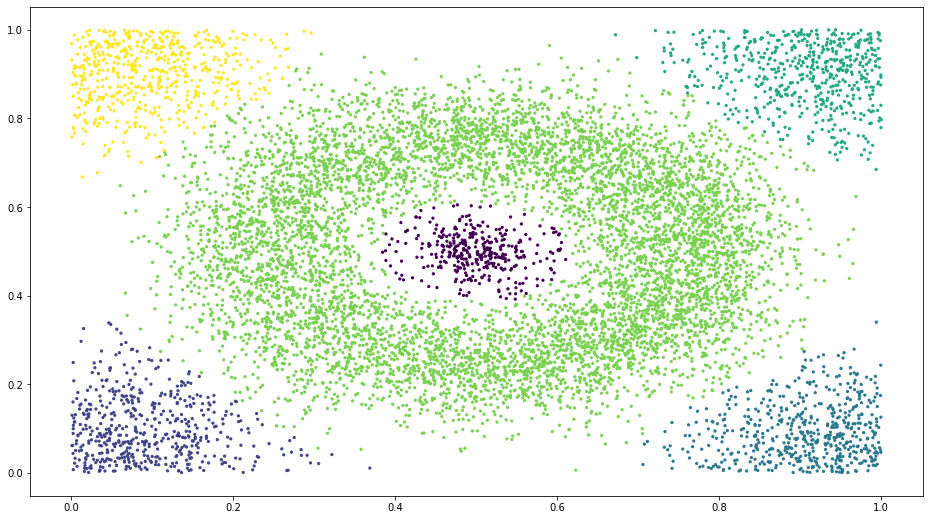

In [52]:
# ToMATo with all parameters estimated from data 
X = np.loadtxt("example/inputs/toy_example_w_o_density.txt")
X[:,0]/=max(X[:,0])
X[:,1]/=max(X[:,1])

tom = ToMATo(verbose=True)
tom.fit(X)
plt.scatter(X[:,0], X[:,1], s=5., c=tom.labels_)
plt.show()

## Mapper

In [53]:
import open3d as o3d

In [54]:
X = np.loadtxt("example/inputs/human")

In [56]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(X)
o3d.draw_geometries([pcd])

KeyboardInterrupt: 

In [47]:
mapper = MapperComplex(inp="point cloud", 
                       filters=X[:,[2,0]], 
                       filter_bnds=np.array([[np.nan,np.nan],[np.nan,np.nan]]), 
                       resolutions=np.array([np.nan,np.nan]), gains=np.array([0.33,0.33]), colors=X[:,2:3]).fit(X)

In [50]:
mapper.mapper_.get_filtration()

[([0], -3.0),
 ([1], -3.0),
 ([0, 1], -3.0),
 ([2], -3.0),
 ([3], -3.0),
 ([2, 3], -3.0),
 ([4], -3.0),
 ([3, 4], -3.0),
 ([5], -3.0),
 ([2, 5], -3.0),
 ([3, 5], -3.0),
 ([2, 3, 5], -3.0),
 ([6], -3.0),
 ([3, 6], -3.0),
 ([4, 6], -3.0),
 ([3, 4, 6], -3.0),
 ([5, 6], -3.0),
 ([7], -3.0),
 ([2, 7], -3.0),
 ([3, 7], -3.0),
 ([2, 3, 7], -3.0),
 ([4, 7], -3.0),
 ([3, 4, 7], -3.0),
 ([5, 7], -3.0),
 ([2, 5, 7], -3.0),
 ([3, 5, 7], -3.0),
 ([2, 3, 5, 7], -3.0),
 ([8], -3.0),
 ([0, 8], -3.0),
 ([1, 8], -3.0),
 ([0, 1, 8], -3.0),
 ([9], -3.0),
 ([0, 9], -3.0),
 ([8, 9], -3.0),
 ([0, 8, 9], -3.0),
 ([10], -3.0),
 ([0, 10], -3.0),
 ([8, 10], -3.0),
 ([0, 8, 10], -3.0),
 ([9, 10], -3.0),
 ([0, 9, 10], -3.0),
 ([8, 9, 10], -3.0),
 ([0, 8, 9, 10], -3.0),
 ([11], -3.0),
 ([0, 11], -3.0),
 ([8, 11], -3.0),
 ([0, 8, 11], -3.0),
 ([9, 11], -3.0),
 ([0, 9, 11], -3.0),
 ([8, 9, 11], -3.0),
 ([0, 8, 9, 11], -3.0),
 ([12], -3.0),
 ([13], -3.0),
 ([12, 13], -3.0),
 ([14], -3.0),
 ([15], -3.0),
 ([14, 15], -3

In [31]:
import pandas as pd
pd.DataFrame(mapper.mapper_.get_filtration())

,0,1
0,[0],-3.0
1,[1],-3.0
2,"[0, 1]",-3.0
3,[2],-3.0
4,[3],-3.0
...,...,...
1266,"[109, 150, 171]",-3.0
1267,"[164, 171]",-3.0
1268,"[109, 164, 171]",-3.0
1269,"[150, 164, 171]",-3.0


In [ ]:
plt.plot(X[:,2], X[:,0])